## Wstępna analiza zdjęć
### Dataset FG-NET

In [1]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2

In [66]:
path = "./FGNET/FGNET/images"
filenames = os.listdir(path)
print(f"Image amount: {len(filenames)}")

individuals = [el[:3] for el in filenames]
print(len(set(individuals)))

Image amount: 1002
82


Max age: 69, Min age: 0
Amount of images of age greater than 30: 148


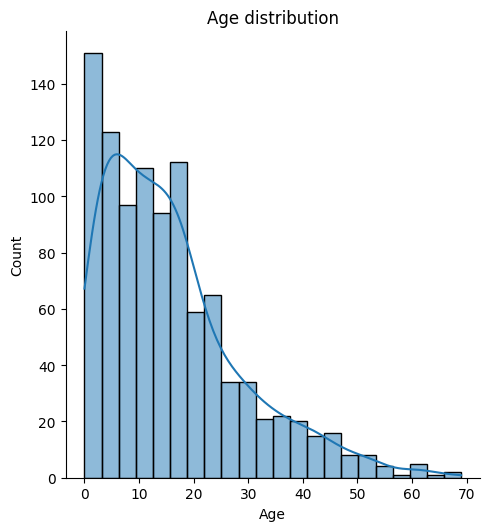

In [57]:
%matplotlib inline
ages = [int(el[4:6]) for el in filenames]
print(f"Max age: {max(ages)}, Min age: {min(ages)}")
top_age = 30
greater_ages = [a for a in ages if a >= top_age]
print(f"Amount of images of age greater than {top_age}: {len(greater_ages)}")
ages_np = np.array(ages)
sns.displot(data=ages_np, kde=True)
plt.xlabel('Age')
plt.title("Age distribution")
plt.show()

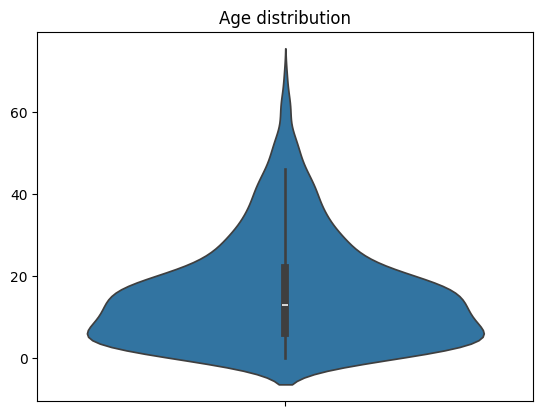

In [56]:
sns.violinplot(data=ages_np)
plt.title("Age distribution")
plt.show()

Male amount: 49, Female amount: 33


/tmp/ipykernel_2419/758634867.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genders, stat='percent', palette='pastel')


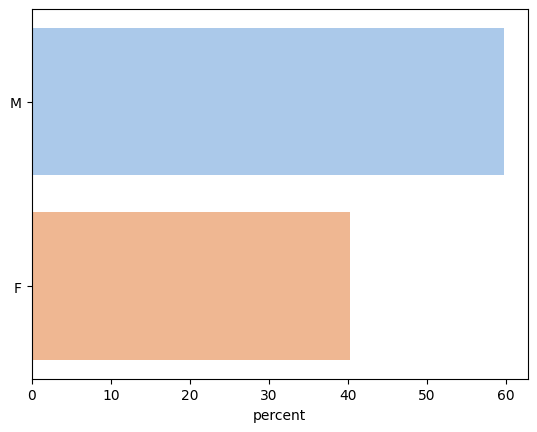

In [19]:
individuals_path = "./FGNET/FGNET/individuals"
individual_fnames = os.listdir(individuals_path)
genders = [n[-5] for n in individual_fnames]
genders_count = Counter(genders)
print(f"Male amount: {genders_count['M']}, Female amount: {genders_count['F']}")
sns.countplot(data=genders, stat='percent', palette='pastel')
plt.show()

In [19]:
counter = Counter(individuals)
max_images = max(counter, key=counter.get)
min_images = min(counter, key=counter.get)
print(f"Max amount of images - {max_images}: {counter[max_images]}, min amount of images - {min_images}: {counter[min_images]}")

Max amount of images - 076: 18, min amount of images - 064: 6


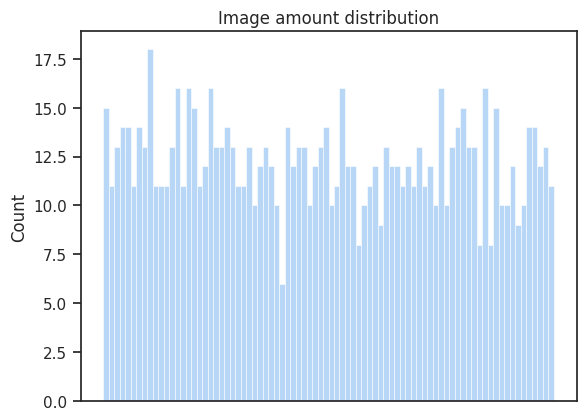

In [64]:
h1 = sns.histplot(data=individuals)
plt.title('Image amount distribution')
h1.set(xticklabels=[])
h1.tick_params(bottom=False)
plt.show()

In [7]:
amounts = list(map(int, counter.values()))
print(f"Median: {np.median(amounts)}")
print(f"Mean: {np.mean(amounts)}")

Median: 12.0
Mean: 12.21951219512195


Znajdują się zarówno szare jak i kolorowe zdjęcia, niektóre zdjęcia są rozmazane.

In [ ]:
# Load images
images = [cv2.imread(os.path.join(path, filename)) for filename in os.listdir(path)]

In [23]:
def check_greyscale():
    for image in images:
        b, g, r = image[:, :, 0], image[:, :, 1], image[:, :, 2]
        if len(image.shape) < 3:
            yield True
        elif image.shape[2] == 1:
            yield True
        elif (b == g).all() and (b == r).all():
            yield True
        else:
            yield False

results = Counter(check_greyscale())
print(f"Greyscale images: {results[True]}, Color images: {results[False]}")


Greyscale images: 187, Color images: 815


Obrazy mają różne kształty

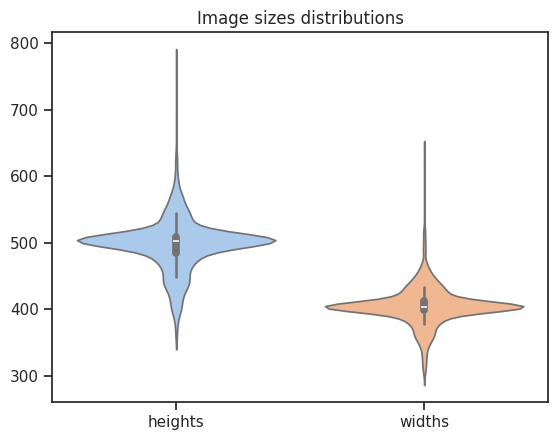

In [52]:
image_widths, image_heights = [], []
for img in images:
    image_widths.append(img.shape[1]), image_heights.append(img.shape[0])

hw_df = pd.DataFrame({'heights': image_heights, 'widths': image_widths})

sns.set_theme(style="ticks", palette="pastel")
plt.title("Image sizes distributions")
sns.violinplot(data=hw_df)
plt.show()



Większość obrazów ma szerokości ok. 400px i wysokości ok. 500px, ale istnieją wartości odstające.

### Dataset CACD

In [10]:
cacd_features_df = pd.DataFrame(pd.read_csv("cacd_meta/CACD_features.csv"))
cacd_features_df.head()

,Unnamed: 0,age,identity,year,rank,lfw,birth,name
0,0,53,1,2004,1,1,1951,53_Robin_Williams_0001.jpg
1,1,53,1,2004,1,1,1951,53_Robin_Williams_0002.jpg
2,2,53,1,2004,1,1,1951,53_Robin_Williams_0003.jpg
3,3,53,1,2004,1,1,1951,53_Robin_Williams_0004.jpg
4,4,53,1,2004,1,1,1951,53_Robin_Williams_0005.jpg


Max age: 62, Min age: 14, Mean: 38.0345924647896, Median: 38.0


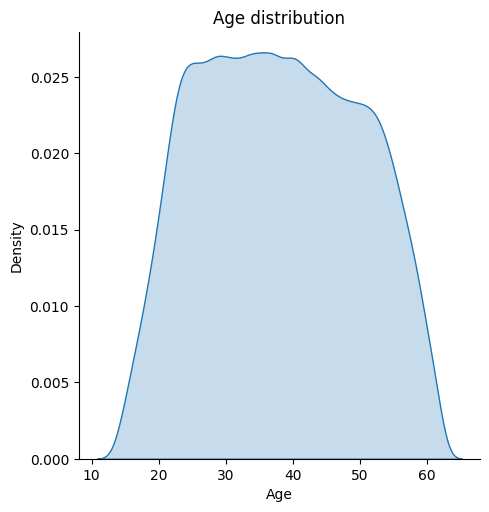

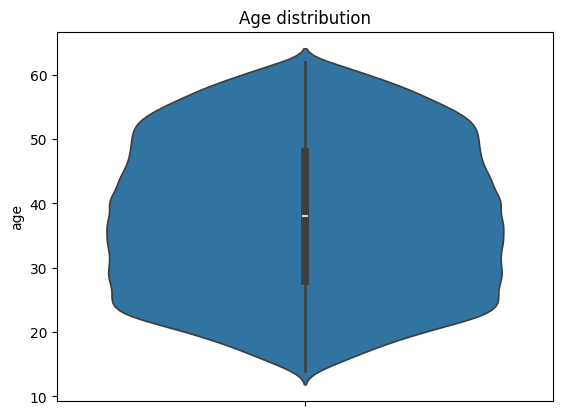

In [11]:
print(f"Max age: {max(cacd_features_df['age'])}, Min age: {min(cacd_features_df['age'])}, Mean: {np.mean(cacd_features_df['age'])}, Median: {np.median(cacd_features_df['age'])}")
sns.displot(cacd_features_df, x="age", kind="kde", fill=True)
plt.xlabel('Age')
plt.title("Age distribution")
plt.show()

sns.violinplot(data=cacd_features_df['age'])
plt.title("Age distribution")
plt.show()

In [44]:
# Image amount per person
img_counter = Counter(cacd_features_df['identity'])
max_img_per_person = max(img_counter, key=img_counter.get)
min_img_per_person = min(img_counter, key=img_counter.get)
print(f"Max amount of images - id{max_img_per_person}: {img_counter[max_img_per_person]}, min amount of images - id{min_img_per_person}: {img_counter[min_img_per_person]}")
print(f"Mean: {np.mean(list(img_counter.values()))}, median: {np.median(list(img_counter.values()))}")


Max amount of images - id1852: 139, min amount of images - id397: 22
Mean: 81.723, median: 81.0


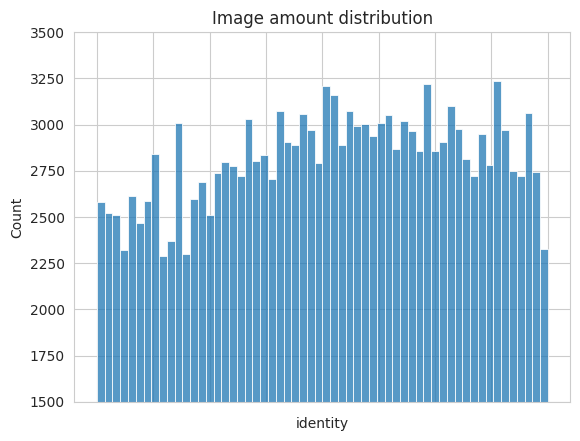

In [65]:
fig, ax = plt.subplots()
sns.histplot(data=cacd_features_df['identity'], ax=ax)
plt.title('Image amount distribution')
ax.set_ylim(1500, 3500)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
plt.show()

/tmp/ipykernel_2005/3408690980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gender_annotated['gender'], stat='percent', palette='pastel')


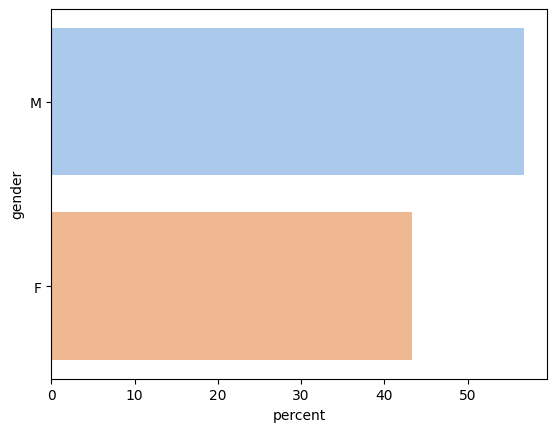

In [6]:
gender_annotated = pd.read_csv("cacd_meta/CACD_features_sex.csv")
gender_annotated = gender_annotated.dropna()
sns.countplot(data=gender_annotated['gender'], stat='percent', palette='pastel')
plt.show()

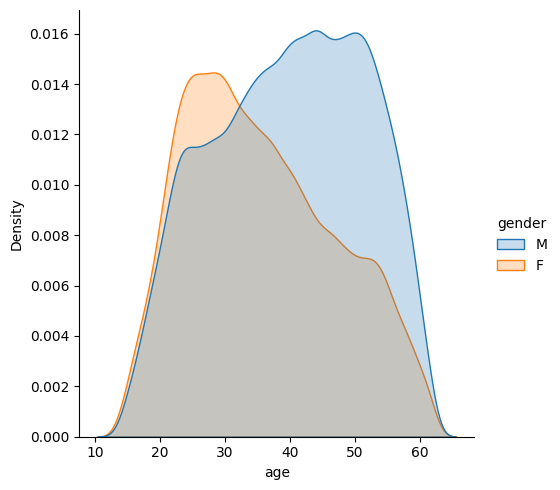

In [7]:
sns.displot(gender_annotated, x="age", hue="gender", kind="kde", fill=True)
plt.show()

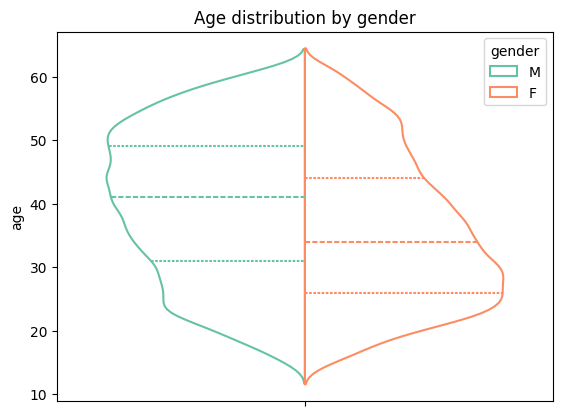

In [20]:
sns.violinplot(data=gender_annotated, y="age", hue="gender",
               split=True, inner="quart", fill=False,
               palette="pastel")
plt.title("Age distribution by gender")
plt.show()